In [448]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
data = pd.read_csv('data/housing.csv')


In [450]:
data.dropna(inplace=True)

In [451]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [452]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [453]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

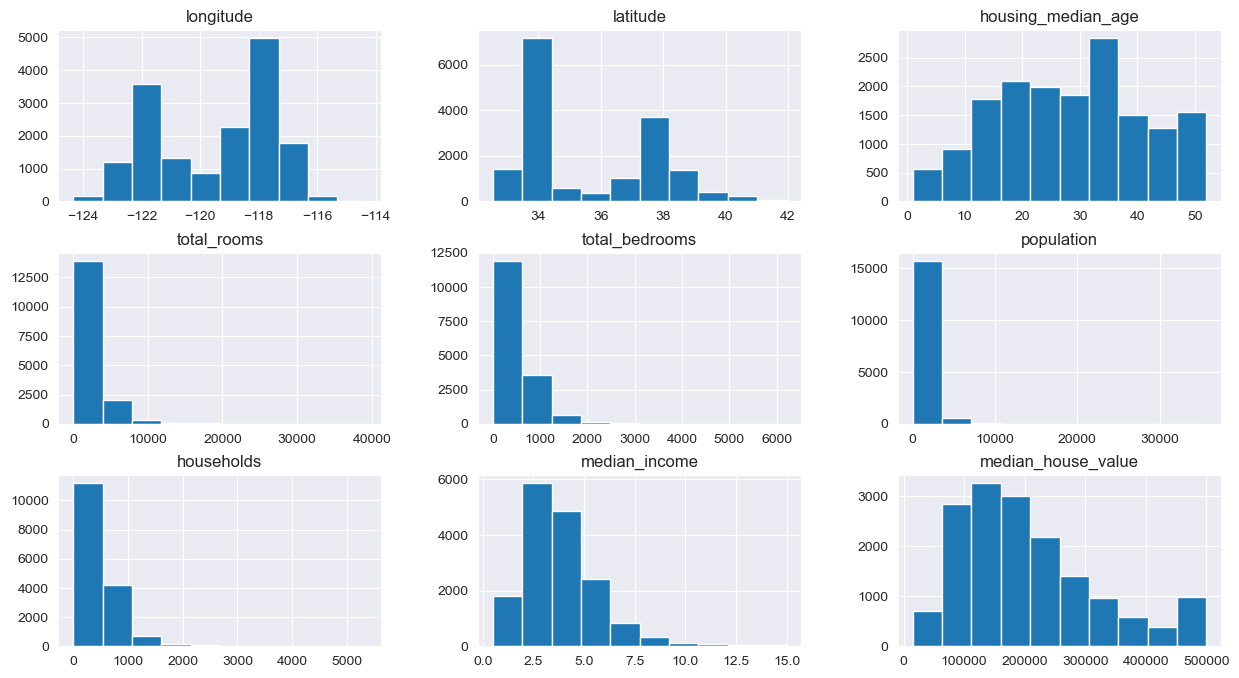

In [454]:
train_data.hist(figsize=(15,8))

<Axes: >

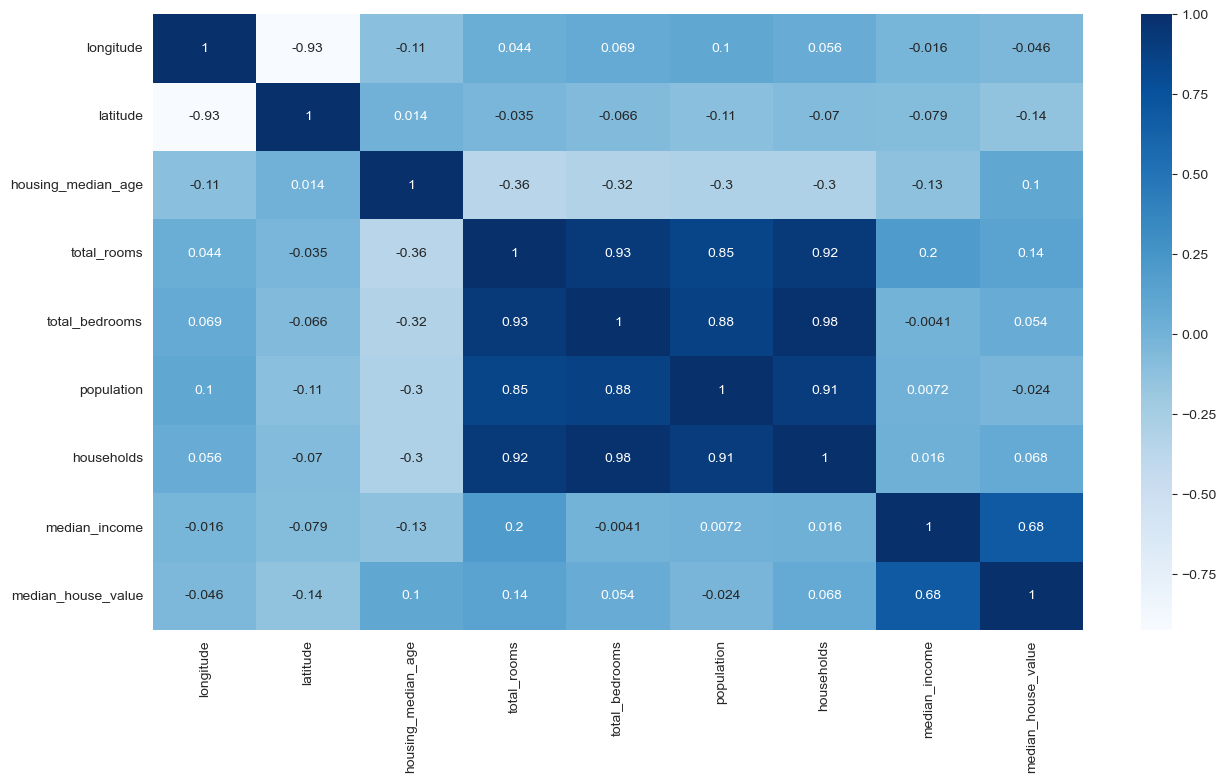

In [455]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

In [456]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

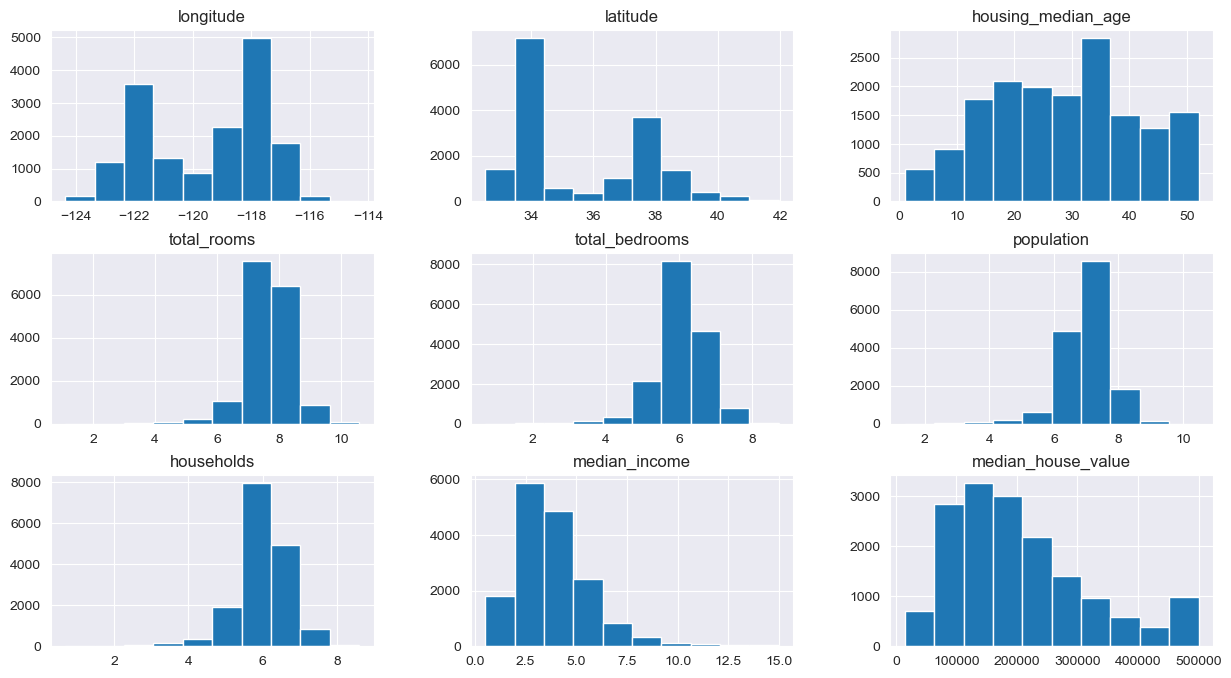

In [457]:
train_data.hist(figsize=(15,8))

In [458]:
print(train_data.ocean_proximity.value_counts());

ocean_proximity
<1H OCEAN     7246
INLAND        5193
NEAR OCEAN    2110
NEAR BAY      1793
ISLAND           4
Name: count, dtype: int64


In [459]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1);

In [460]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
607,-122.08,37.69,42.0,7.254885,5.616771,6.445720,5.501258,3.3478,184900.0,False,False,False,True,False
19984,-119.33,36.19,27.0,6.037871,5.099866,5.808142,4.955827,1.0714,63800.0,False,True,False,False,False
16471,-121.25,38.13,25.0,7.174724,5.602119,6.672033,5.463832,3.2993,91100.0,False,True,False,False,False
19359,-123.01,38.80,21.0,5.888878,4.574711,4.882802,4.317488,3.5156,133300.0,True,False,False,False,False
8408,-118.35,33.93,35.0,6.957497,5.533389,6.823286,5.468060,1.7344,146900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10819,-117.92,33.64,5.0,6.856462,5.662960,6.210600,5.501258,2.7500,225000.0,True,False,False,False,False
19132,-122.70,38.23,47.0,7.645398,5.961005,6.960348,5.934894,3.5673,310300.0,True,False,False,False,False
1497,-122.00,37.95,9.0,7.703008,5.549076,6.744059,5.480639,6.8145,339200.0,False,True,False,False,False
3359,-120.64,40.41,50.0,7.462789,6.052089,6.895683,5.950643,1.5066,59300.0,False,True,False,False,False


plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: xlabel='latitude', ylabel='longitude'>

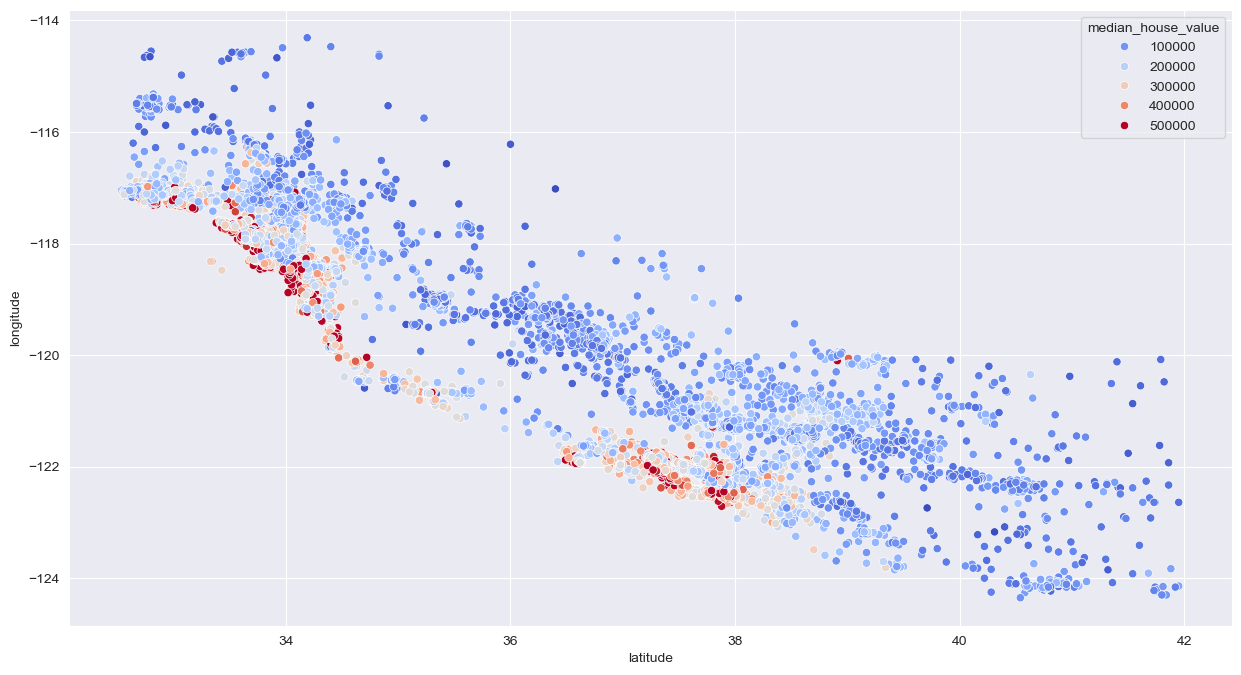

In [462]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [463]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']    

<Axes: >

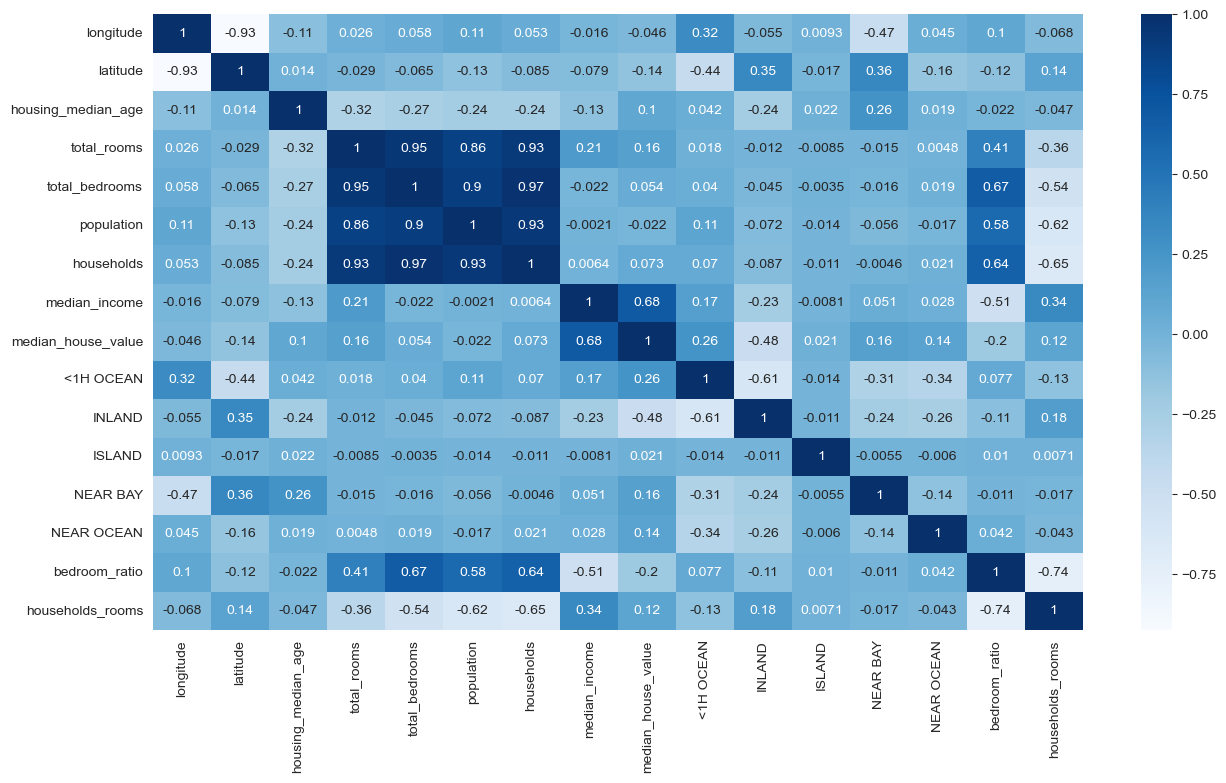

In [464]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

In [465]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, Y_train)

LinearRegression()

In [466]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1);

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']    
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [467]:
X_test_s = scaler.fit_transform(X_test)

In [468]:
reg.score(X_test_s, Y_test)

0.6810544166093584

In [469]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor();
forest.fit(X_train, Y_train);
print(forest.score(X_test, Y_test));

0.8260956136177943


In [470]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8],
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_s, Y_train);

In [473]:
best_forest = grid_search.best_estimator_

In [472]:
best_forest.score(X_test_s, Y_test)

0.7228009083466052

In [475]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)